 ПРОЕКТ
 
 Принятие решений в бизнесе

* Цель исследования: 

Увеличение выручки крупного интернет-магазина путем выбора гипотезы, запуска  A/B-теста и анализом результата работы

* Задачи исследования:

Приоритизировать гипотезы, провести предобработку данных, построить графики кумулятивных среднего чека и количества заказов, построить точечные графики и расчитать перцентили, определить границы аномалий, запустить A/B-тест и проанализировать результаты

* Исходные данные:

В первой части работы имеем датасет с 9-ю гипотезами по увеличению выручки

Во второй части работы имеем два датасета: в одном из них данные о заказах, во втором данные о пользователях

# Часть 1. Приоритизация гипотез.

In [1]:
#сразу импортируем необходимые нам библиотеки

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
#откроем файлы

if os.path.exists('/datasets/hypothesis.csv'):
     data= pd.read_csv('/datasets/hypothesis.csv')
else:
     data = pd.read_csv('hypothesis.csv')

In [3]:
if os.path.exists('/datasets/orders.csv'):
     orders= pd.read_csv('/datasets/orders.csv')
else:
     orders = pd.read_csv('orders.csv')

In [4]:
if os.path.exists('/datasets/visitors.csv'):
     visitors= pd.read_csv('/datasets/visitors.csv')
else:
     visitors = pd.read_csv('visitors.csv')

## Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета

In [5]:
# посмотрим на данные

data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Для расчет ICE нам потребуется следующая формула: 

`ICE=(Impact*Confidence)/Efforts`

In [6]:
# расчитаем ICE

data['ICE']=(data['Impact']*data['Confidence'])/data['Efforts']

data['ICE']=round(data['ICE'])

In [7]:
# проверим результат, отсортировав по убыванию приоритета

data[['Hypothesis','ICE']].sort_values(by='ICE',ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.0
0,"Добавить два новых канала привлечения трафика,...",13.0
7,Добавить форму подписки на все основные страни...,11.0
6,Показать на главной странице баннеры с актуаль...,8.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.0
1,"Запустить собственную службу доставки, что сок...",2.0
3,"Изменить структура категорий, что увеличит кон...",1.0
4,"Изменить цвет фона главной страницы, чтобы уве...",1.0
5,"Добавить страницу отзывов клиентов о магазине,...",1.0


Как можно наблюдать, наиболее перспективными гипотезами по ICE являются 8, 0, 7 и 6

## Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета

Для расчет RICE нам потребуется следующая формула: 

`RICE=(Reach*Impact*Confidence)/Efforts`

In [8]:
# расчитаем RICE

data['RICE']=(data['Reach']*data['Impact']*data['Confidence'])/data['Efforts']

In [9]:
# проверим результат, отсортировав по убыванию приоритета

data[['Hypothesis','RICE']].sort_values(by='RICE',ascending=False)

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


Как можно наблюдать, наиболее перспективными гипотезами по RICE являются 7,2,0 и 6

## Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло

Можем сравнить приоритизацию гипотез при применении RICE и ICE

При применении этих двух способов есть совпадения: гипотезы 0, 7 и 6 в обоих случаях выглядят наиболее перспективными

Однако, в случае применения метода RICE на первом месте находится гипотеза номер 7, а в случае с применением способа ICE - гипотеза номер 8

Это связано с различиями в формулах этих двух методов: RICE учитывает и то, как много пользователей коснется данная гипотеза, параметр `Reach`

In [10]:
# посмотрим на столбец Reach

display(data[['Hypothesis','Reach']])

display(data[['Hypothesis','RICE']].sort_values(by='RICE',ascending=False))

,Hypothesis,Reach
0,"Добавить два новых канала привлечения трафика,...",3
1,"Запустить собственную службу доставки, что сок...",2
2,Добавить блоки рекомендаций товаров на сайт ин...,8
3,"Изменить структура категорий, что увеличит кон...",8
4,"Изменить цвет фона главной страницы, чтобы уве...",3
5,"Добавить страницу отзывов клиентов о магазине,...",3
6,Показать на главной странице баннеры с актуаль...,5
7,Добавить форму подписки на все основные страни...,10
8,"Запустить акцию, дающую скидку на товар в день...",1


,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


Можем наблюдать, что параметр Reach у гипотезы номер 7 равен 10, а у гипотезы номер 8 - одному

То есть, при выборе гипотезы номер 7 изменение, которое мы хотим внести, коснется бОльшего числа пользователей, чем при выборе гипотезы номер 8

Отсюда изменение в приоритизации при применении разных способов

# Часть 2. Анализ A/B-теста

In [11]:
# посмотрим на данные

print(orders.head())

print(visitors.head())

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B
         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756


Проведем предобработку данных

In [12]:
# проверим данные на наличие пропусков 

display(orders.isna().sum())
display(visitors.isna().sum())

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

In [13]:
#проверка на дубликаты

display(orders.duplicated().sum())
display(visitors.duplicated().sum())

0

0

Пропусков и дубликатов в данных не обнаружено

Посмотрим на количество групп в А/В тесте

In [14]:
orders_new = (
    orders.groupby('group', as_index=False)
    .agg({'visitorId': 'count'})
)

print(orders_new)

  group  visitorId
0     A        557
1     B        640


Всего наблюдаем две группы: А и В

Видим, что в группе В пользователей несколько больше, чем в группе А

Так же проверим, не попадают ли у нас пользователи в обе группы

In [15]:
#проверим на попадания в обе группы

mask = orders.loc[orders["group"]=="a", "visitorId"].isin(orders.loc[orders["group"]=="b", "visitorId"])
res = orders.drop(mask[mask].index)
print(res.shape)

(1197, 5)


Таких совпадений мы не обнаружили

Проверим также период, за который нам доступны данные

In [16]:
print(orders['date'].min(),
orders['date'].max())

2019-08-01 2019-08-31


Данные представлены за август 2019 года

## Построим график кумулятивной выручки по группам. Сделаем выводы и предположения

In [17]:
# Создадим датафрейм datesGroups с уникальными парами значений 'date' и 'group', избавившись от дубликатов

datesGroups = orders[['date','group']].drop_duplicates() 


In [18]:
# Объявим переменную ordersAggregated

ordersAggregated=datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [19]:
# Объявим переменную visitorsAggregated

visitorsAggregated=datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [20]:
# Определим переменную cumulativeData c новыми названиями столбцов

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [21]:
# Объявим переменные cumulativeRevenueA и cumulativeRevenueB с данными из групп А и В

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

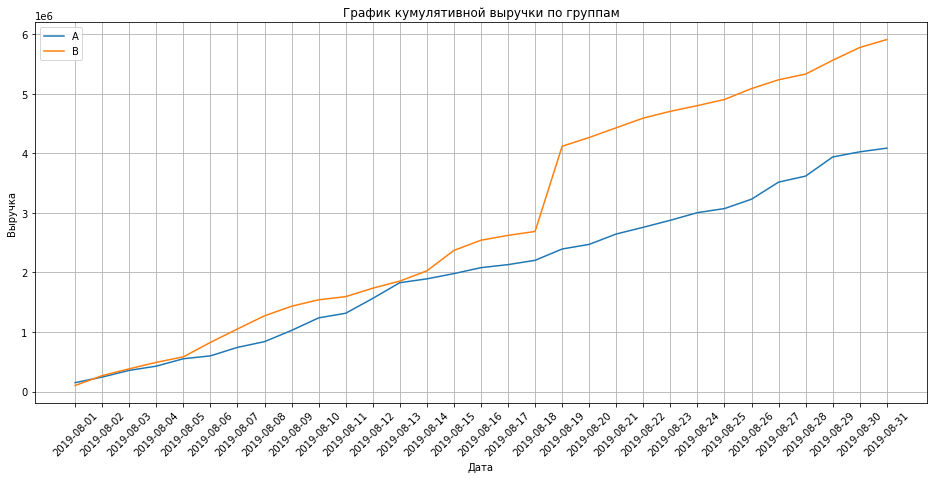

In [22]:
# Строим график выручки группы А

plt.figure(figsize=(16, 7));
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Дата');
plt.ylabel('Выручка')
plt.legend()
plt.title('График кумулятивной выручки по группам')
plt.xticks(rotation=45)
plt.grid()
plt.show();

Из графика видно, что приблизительно после середины теста группа В значительно стала превосходить группу А

Можем сделать предположение, что в этот момент произошли какие-то большие заказы, которые могли повлиять на группу В

## Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения

Для построения графикв среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов

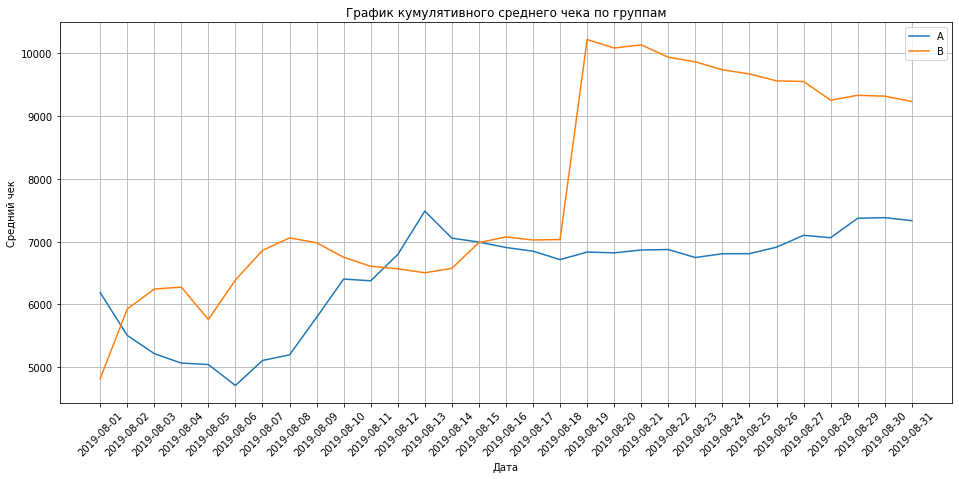

In [23]:
# построим графики для обоих сегментов

plt.figure(figsize=(16, 7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дата');
plt.ylabel('Средний чек')
plt.legend()
plt.title('График кумулятивного среднего чека по группам')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Наблюдаем нестабильность среднего чека по двум сегментам - А и В

Вероятно, эта метрика не позволит нам принять верное решение

Искажать результаты могут выбросы, возможно, потребуется дополнительно исследовать и проанализировать их

## Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения

Объединим таблицы cumulativeRevenueA и cumulativeRevenueB в переменной mergedCumulativeRevenue

Затем построим график относительно различия кумулятивного среднего чека группы B к группе A

In [24]:
# обьединим таблицы

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date',\
                                                   right_on='date', how='left', suffixes=['A', 'B'])

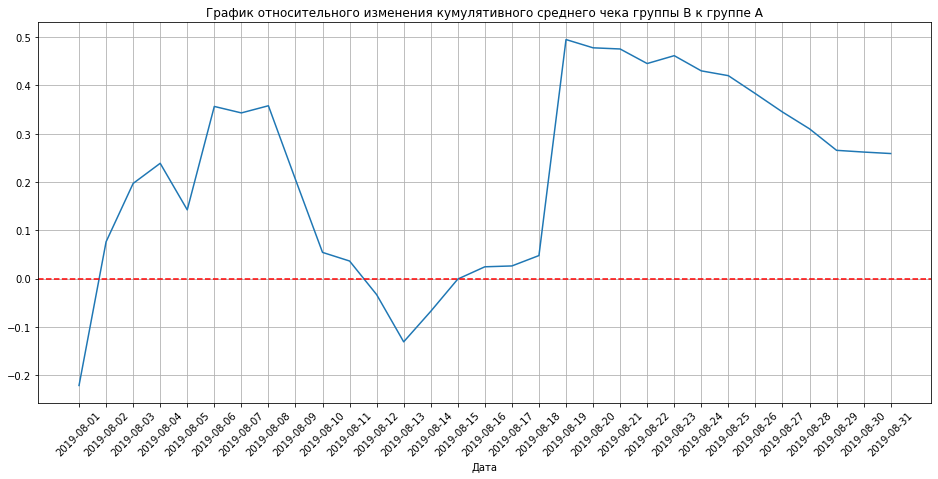

In [25]:
# построим график, добавив пунктирную линию оси Х

plt.figure(figsize=(16, 7))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Дата')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=45)
plt.grid()
plt.show()

На графике мы можем наблюдать относительное различие в среднем чеке между группами А и В

В некоторые даты результаты теста резко меняются

Вероятно, это связано с аномальными заказами в одной из групп

## Построим график кумулятивного среднего количества заказов по группам. Сделаем выводы и предположения

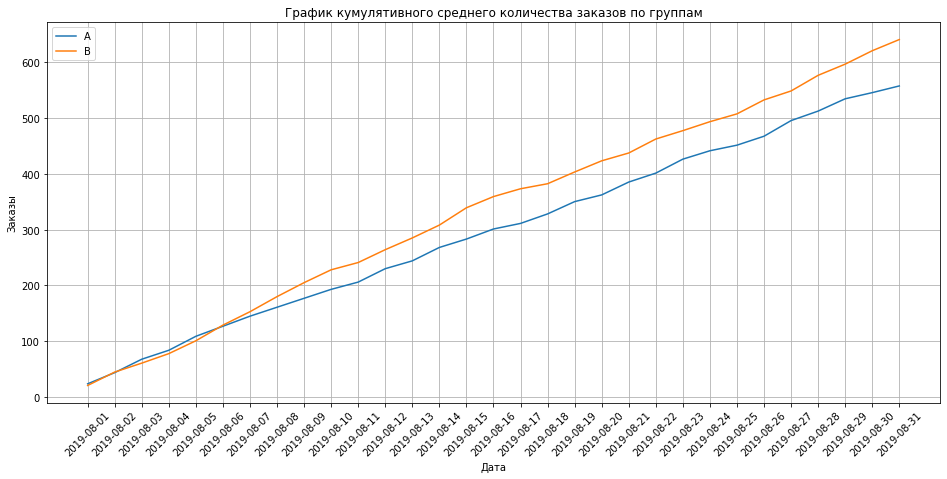

In [26]:
# Строим график  группы А

plt.figure(figsize=(16, 7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders'], label='A')

# Строим график  группы B

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дата');
plt.ylabel('Заказы')
plt.legend()
plt.title('График кумулятивного среднего количества заказов по группам')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Можем наблюдать, что среднее количество заказов в группе В с какого-то момента времени становится больше, чем в группе А

И в дальнейшем в течении времени эта разница сохраняется

Можно предположить, что в этот определенный момент времени произошло какое-то событие, которое повлияло на количество заказов в группе В

## Построим график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделаем выводы и предположения

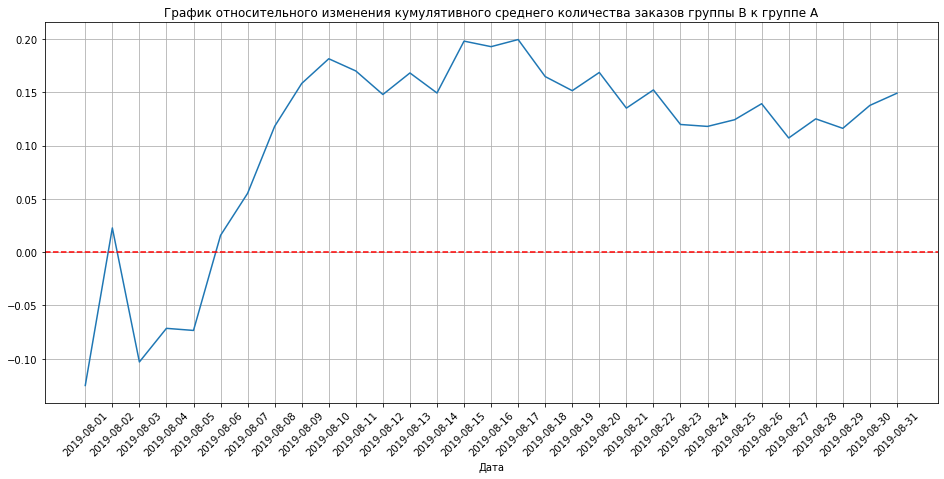

In [27]:
# построим график, добавив пунктирную линию оси Х

plt.figure(figsize=(16, 7))
plt.plot(mergedCumulativeRevenue['date'], mergedCumulativeRevenue['ordersB']/mergedCumulativeRevenue['ordersA']-1)

plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Дата')
plt.title('График относительного изменения кумулятивного среднего количества заказов группы B к группе A')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Комулятивное среднее количество заказов в группе В почти с самого начала теста оказалось выше, чем в группе А

Можно предположить, что в этот определенный момент времени произошло какое-то событие, которое повлияло на количество заказов в группе В

## Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения

In [28]:
# сгруппируем таблицу с заказами по пользователям и посмотрим на количество заказов

ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


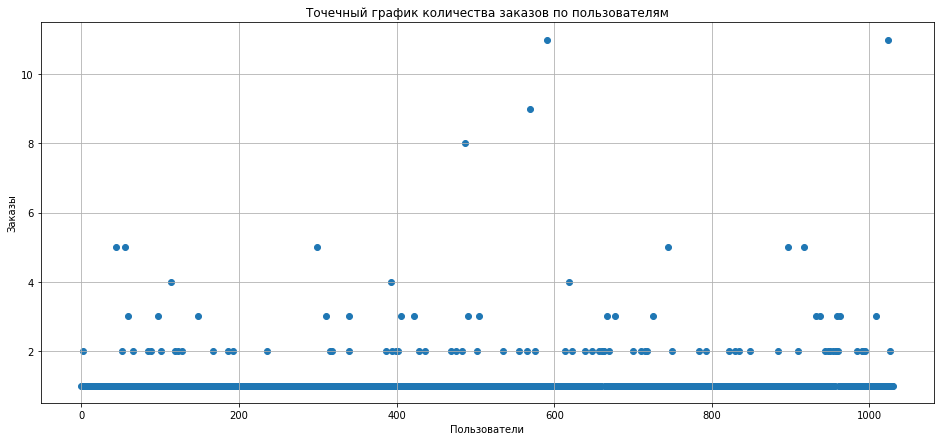

In [29]:
# строим диаграмму методом scatter()

x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(16, 7))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователи');
plt.ylabel('Заказы')
plt.grid()
plt.show()

Как можно увидеть из графика, в основном пользователи совершают до 4-5 заказов

Но есть и те, кто совершает по 10 и более покупок

Такие пользователи могут влиять в дальнейшем на наше исследование

## Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей

In [30]:
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


In [31]:
# взглянем на 90, 95 и 99 перцентили количества заказов на одного пользователя

print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 2. 4.]


Не более 5% пользователей оформляли больше чем 2 заказа.

Больше четырех заказов оформило менее одного процента пользователей

Примем за аномальных пользователей тех, кто совершил от 4 заказов и более

Так мы уберём 1% пользователей с наибольшим числом заказов 


## Построим точечный график стоимостей заказов. Сделаем выводы и предположения

In [32]:
# отсортируем по уменьшению стоиомсти заказов

print(orders.sort_values(by='revenue', ascending=False).head(10))

      transactionId   visitorId        date  revenue group
425       590470918  1920142716  2019-08-19  1294500     B
1196     3936777065  2108080724  2019-08-15   202740     B
858       192721366  1316129916  2019-08-27    93940     A
1136      666610489  1307669133  2019-08-13    92550     A
744      3668308183   888512513  2019-08-27    86620     B
682      1216533772  4266935830  2019-08-29    78990     B
662      1811671147  4266935830  2019-08-29    78990     A
743      3603576309  4133034833  2019-08-09    67990     A
1103     1348774318  1164614297  2019-08-12    66350     A
1099      316924019   148427295  2019-08-12    65710     A


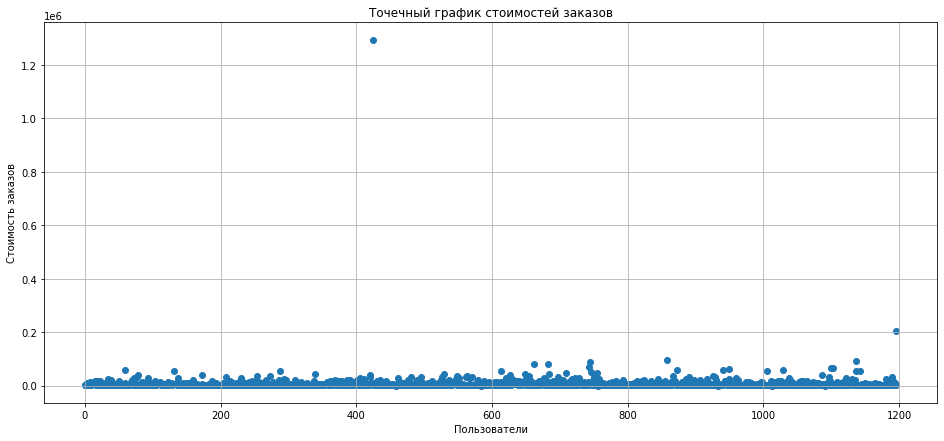

In [33]:
#строим диаграмму методом scatter()

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(16, 7))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Пользователи');
plt.ylabel('Стоимость заказов')
plt.grid()
plt.show()

Видим, что есть заказы стоиомостью выше 100 000 и даже 200 000 

Но они редки

В основном стоимости находятся в диапазоне до 50 тысяч

## Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов

In [34]:
print(orders.sort_values(by='revenue', ascending=False).head(10))

      transactionId   visitorId        date  revenue group
425       590470918  1920142716  2019-08-19  1294500     B
1196     3936777065  2108080724  2019-08-15   202740     B
858       192721366  1316129916  2019-08-27    93940     A
1136      666610489  1307669133  2019-08-13    92550     A
744      3668308183   888512513  2019-08-27    86620     B
682      1216533772  4266935830  2019-08-29    78990     B
662      1811671147  4266935830  2019-08-29    78990     A
743      3603576309  4133034833  2019-08-09    67990     A
1103     1348774318  1164614297  2019-08-12    66350     A
1099      316924019   148427295  2019-08-12    65710     A


In [35]:
# взглянем на 90, 95 и 99 перцентили стоимости заказов

print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


Менее одного процента заказов имели стоимость свыше 58 000

И не более 10 процентов - выше 18 000

Примем за аномальных пользователей тех, кто совершил заказ дороже 28 000 рублей

Так мы уберём 5% пользователей с дорогими заказами



## Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделаем выводы и предположения

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть

Создадим таблицу data

In [36]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

         date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0  2019-08-01              24           148579              21   
1  2019-08-02              20            93822              24   
2  2019-08-03              24           112473              16   
3  2019-08-04              16            70825              17   
4  2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61           

Мы создали следующие столбцы:

* date — дата

* ordersPerDateA — количество заказов в выбранную дату в группе A

* revenuePerDateA — суммарная выручка в выбранную дату в группе A

* ordersPerDateB — количество заказов в выбранную дату в группе B

* revenuePerDateB — суммарная выручка в выбранную дату в группе B

* ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A

* revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A

* ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B

* revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B

* visitorsPerDateA — количество пользователей в выбранную дату в группе A

* visitorsPerDateB — количество пользователей в выбранную дату в группе B

* visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A

* visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B


Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders'].

В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов

In [37]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 

Тем, кто ничего не заказал, будут соответствовать нули

In [38]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


Применим критерий Манна-Уитни

In [39]:
print('p-value:',(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительные различия между группами: '"{0:.5f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.016792355056752608
Относительные различия между группами: 0.13808


Первое число p-value = 0.0168 меньше 0.05

Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, можем отвергнуть

То есть, можно предположить, что есть статистически значимые различия в среднем числе заказов между группами

Второе число 0.13808 как раз показывает, что относительный выигрыш группы В по сравнению с группой А равен почти 14%

## Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию Манна-Уитни данные о выручке с заказов

А ещё найдём относительные различия в среднем чеке между группами

In [40]:
print('p-value:',(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительные различия между группами: ','{0:.5f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.7292909855432458
Относительные различия между группами:  0.25871


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет

Относительное различие в средних чеках между группами составляет порядка 25 процентов в пользу группы В

## Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделаем выводы и предположения

Примем за аномальных пользователей тех, кто совершил от 4 заказов или совершил заказ дороже 28 000 рублей

Так мы уберём 1% пользователей с наибольшим числом заказов и  5% пользователей с дорогими заказами

Сделаем срезы пользователей с числом заказов больше 4 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders

Объединим их в таблице abnormalUsers

Чтобы в дальнейшем мы всегда могли изменить при необходимости пороговые значения для определения аномалий, создадим две переменные Ord_trh и Rev_trh


In [41]:
# создадим таблицу abnormalUsers

Ord_trh=4
Rev_trh=28000

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > Ord_trh]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > Ord_trh]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > Rev_trh]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
dtype: int64
59


Можем наблюдать, что таких аномальных пользователей у нас 59 

Подготовим выборки количества заказов по пользователям по группам теста

In [42]:
# для группы А

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# для группы В

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [43]:
print('p-value:',(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительные различия между группами: ','{0:.5f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value: 0.018457083488550192
Относительные различия между группами:  0.14535


Первое число p-value = 0.01846 меньше 0.05

Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, можем отвергнуть

То есть, можно предположить, что есть статистически значимые различия в среднем числе заказов между группами

Второе число 0.14535 как раз показывает, что относительный выигрыш группы В по сравнению с группой А равен  14%

Как и в случае с сырыми данными, статистическая значимость достигнута: сегмент В лучше сегмента А

## Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть

Применим статистический критерий Манна-Уитни

In [44]:
print(
    'p-value:',(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительные различия между группами: ',
    "{0:.5f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.9612742488180921
Относительные различия между группами:  -0.01383


Первое число p-value = 0.9613 больше 0.05

Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет

Второе число -0.01383  показывает, что относительный проигрыш группы В по сравнению с группой А равен 1,3 процента

После очистки сырых данных и удаления аномальных пользователей, изменилась относительная разница в среднем чеке между группами: если в исходных данных группа В на 25 процентов превосходила группу А, то после удаления аномалий группа В стала совсем немного, порядка полутора процентов, проигрывать группе А

## Примим решение по результатам теста и объясним его

Исходя из проведенного исследования, можно отметить следующее:

* Проведя предобработку, было выяснено, что мы имеем данные за период с 1 по 31 августа 2019 года. Пользователи разбиты на 2 группы по гипотезам: А и В

* При построении графиков мы увидели, что кумулятивные средний чек, выручка и число заказов у группы В имеют лучшие показатели, чем у группы А


* Что до очистки данных от аномалий, что после, есть статистически значимые различия в среднем количестве заказов  между группами. Относительный выигрыш группы В по сравнению с группой А составляет порядка 14 процентов


* Построение точечных графиков показало, что большинство пользователей совершают менее 4 заказов на сумму не более 28 тысяч. Было принято решение пользователей, выходящих за эти рамки, считать аномальными


* Аномальных пользователей в нашем случае было 59 человек


* Что касается среднего чека в разбивке по группам, до удаления аномальных пользователей группа В на 25 процентов выигрывала у группы А. Однако, после удаления больших заказов, средние чеки у обеих групп стали относительно равными

* То есть, при относительно равных чеках у обеих групп, у группы В наблюдается значительно превосходящее группу А количество заказов - на 14 процентов


* Эти выводы позволяют нам принять решение о том, что у группы В есть преимущества перед группой А

Проанализировав выводы, принимаем решение остановить тест и зафиксировать победу группы В